# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "q=" + city + '&units=imperial' + "&appid=" + weather_api_key 

In [4]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -50.2056, 'lat': -30.1811},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 65.57,
  'feels_like': 65.5,
  'temp_min': 65.57,
  'temp_max': 65.57,
  'pressure': 1017,
  'humidity': 78,
  'sea_level': 1017,
  'grnd_level': 1016},
 'visibility': 10000,
 'wind': {'speed': 7.45, 'deg': 142, 'gust': 10.71},
 'clouds': {'all': 29},
 'dt': 1666473562,
 'sys': {'country': 'BR', 'sunrise': 1666427702, 'sunset': 1666474514},
 'timezone': -10800,
 'id': 3466165,
 'name': 'Cidreira',
 'cod': 200}

In [5]:
# Create lists for each varibale needed 
name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#start counter to record city and set numebr for log 
city_number = 0
set_number = 1

#start log statement
print("Beginning Data Retrieval")
print('-----------------------------')

#start for loop for cities list 
for city in cities:
    
    try:
        #put request in for loop to cycle through cities list
        query_url = url + "q=" + city + '&units=imperial' + "&appid=" + weather_api_key 
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        #create variables to create the data before we can store it 
        #otherwise descrepencies in list length and where data shows 
        name_city = weather_json['name']
        lat_city = weather_json['coord']['lat']
        long_city = weather_json['coord']['lon']
        max_temp_city = weather_json['main']['temp_max']
        humidity_city = weather_json['main']['humidity']
        cloudiness_city = weather_json['clouds']['all']
        wind_speed_city = weather_json['wind']['speed']
        country_city = weather_json['sys']['country']
        date_city = weather_json['dt']
        
        #append lists
        name.append(name_city)
        lat.append(lat_city)
        long.append(long_city)
        max_temp.append( max_temp_city)
        humidity.append(humidity_city)
        cloudiness.append(cloudiness_city)
        wind_speed.append(wind_speed_city)
        country.append(country_city)
        date.append(date_city)
        
        #add 1 to city number every time it loop
        city_number += 1
        
        #if city number reaches 50, reset city number and add 1 to set number 
        if city_number >= 51:
            set_number += 1
            city_number = 0
            
        #Print log statements
        print(f"Processing Record {city_number} of Set {set_number} | {name_city}")
   
    #if city isn't found, skip over it and keep running
    except Exception as e:
         print('City not found. Skipping...')
            
#end log statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Mahon
Processing Record 2 of Set 1 | Longyearbyen
Processing Record 3 of Set 1 | Thompson
Processing Record 4 of Set 1 | Saint George
City not found. Skipping...
Processing Record 5 of Set 1 | Butaritari
Processing Record 6 of Set 1 | Cape Town
Processing Record 7 of Set 1 | Ortona
Processing Record 8 of Set 1 | Lebu
Processing Record 9 of Set 1 | San Cristobal
Processing Record 10 of Set 1 | Ushuaia
Processing Record 11 of Set 1 | Atuona
Processing Record 12 of Set 1 | Yichun
Processing Record 13 of Set 1 | Nemuro
Processing Record 14 of Set 1 | Plouzané
Processing Record 15 of Set 1 | Saint Paul Harbor
Processing Record 16 of Set 1 | Grand Gaube
Processing Record 17 of Set 1 | Bluff
Processing Record 18 of Set 1 | Kupang
City not found. Skipping...
Processing Record 19 of Set 1 | Busselton
Processing Record 20 of Set 1 | Rikitea
City not found. Skipping...
Processing Record 21 of Set 1 | Lerwick
Cit

Processing Record 33 of Set 4 | Daru
Processing Record 34 of Set 4 | Celestún
Processing Record 35 of Set 4 | Pisco
Processing Record 36 of Set 4 | Gusev
Processing Record 37 of Set 4 | Iqaluit
Processing Record 38 of Set 4 | Tiksi
Processing Record 39 of Set 4 | Rāvar
Processing Record 40 of Set 4 | Provincia di Lecce
Processing Record 41 of Set 4 | Altamira
Processing Record 42 of Set 4 | San Policarpo
Processing Record 43 of Set 4 | Boyolangu
Processing Record 44 of Set 4 | Hirson
Processing Record 45 of Set 4 | Kaputa
Processing Record 46 of Set 4 | Vostok
Processing Record 47 of Set 4 | Mitsamiouli
City not found. Skipping...
Processing Record 48 of Set 4 | Salinas
Processing Record 49 of Set 4 | George Town
City not found. Skipping...
Processing Record 50 of Set 4 | Cartagena
Processing Record 0 of Set 5 | Vyartsilya
Processing Record 1 of Set 5 | La Libertad
Processing Record 2 of Set 5 | Kattivākkam
Processing Record 3 of Set 5 | Poya
Processing Record 4 of Set 5 | Barra de Tec

Processing Record 18 of Set 8 | Yulara
Processing Record 19 of Set 8 | Constitución
Processing Record 20 of Set 8 | Cherskiy
Processing Record 21 of Set 8 | Gualaca
Processing Record 22 of Set 8 | Dawson Creek
Processing Record 23 of Set 8 | Banjarmasin
Processing Record 24 of Set 8 | Lucapa
Processing Record 25 of Set 8 | San Andrés
Processing Record 26 of Set 8 | Margate
Processing Record 27 of Set 8 | Mayo
Processing Record 28 of Set 8 | Olafsvik
Processing Record 29 of Set 8 | Charters Towers
Processing Record 30 of Set 8 | Srednekolymsk
Processing Record 31 of Set 8 | Taoudenni
Processing Record 32 of Set 8 | Lufilufi
Processing Record 33 of Set 8 | Sheboygan
Processing Record 34 of Set 8 | Mossamedes
Processing Record 35 of Set 8 | Mujiayingzi
Processing Record 36 of Set 8 | Kalmunai
Processing Record 37 of Set 8 | Dongying
Processing Record 38 of Set 8 | Portland
Processing Record 39 of Set 8 | Turgutlu
Processing Record 40 of Set 8 | Pokhara
Processing Record 41 of Set 8 | Nata

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create new dataframe 
city_data = pd.DataFrame({
                          "City": name, 
                          "Lat": lat, 
                          "Lng": long, 
                          "Max Temp": max_temp, 
                          "Humidity": humidity, 
                          "Cloudiness": cloudiness, 
                          "Wind Speed": wind_speed, 
                          "Country": country, 
                          "Date": date
    
})

#export dataframe to cvs
city_data.to_csv('city_data.csv')

#print dataframe 
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahon,39.8885,4.2658,72.16,100,0,8.05,ES,1666474053
1,Longyearbyen,78.2186,15.6401,21.04,58,20,4.61,SJ,1666473481
2,Thompson,55.7435,-97.8558,41.16,56,75,4.61,CA,1666473477
3,Saint George,37.1041,-113.5841,79.79,17,0,33.38,US,1666473474
4,Butaritari,3.0707,172.7902,81.14,67,100,10.13,KI,1666473470
...,...,...,...,...,...,...,...,...,...
544,Linqiong,30.4159,103.4609,67.82,62,97,2.08,CN,1666474250
545,Marabu,4.4148,114.0089,77.14,94,40,0.00,MY,1666474251
546,Burnie,-41.0667,145.9167,53.94,96,100,13.56,AU,1666474251
547,Bathsheba,13.2167,-59.5167,84.81,74,40,12.66,BB,1666474252


In [7]:
#describe dataset 
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,21.612882,18.225450,60.557413,72.189435,54.360656,8.390947,1.666474e+09
std,32.541200,91.614113,20.383460,21.102647,40.919464,5.992072,2.463445e+02
min,-54.800000,-175.200000,-14.060000,6.000000,0.000000,0.000000,1.666473e+09
25%,-3.666700,-65.712500,48.250000,63.000000,7.000000,4.120000,1.666474e+09
50%,26.650300,22.636700,65.980000,78.000000,65.000000,6.960000,1.666474e+09
75%,48.826400,100.335400,77.110000,87.000000,100.000000,11.500000,1.666474e+09
max,78.218600,179.316700,91.560000,100.000000,100.000000,42.480000,1.666474e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#find max humidity to determine if cities need to be removed 
city_data["Humidity"].describe()

#max humidity for the dataset is 100% so no data needs to be removed

count    549.000000
mean      72.189435
std       21.102647
min        6.000000
25%       63.000000
50%       78.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [9]:
#  Get the indices of cities that have humidity over 100%.

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

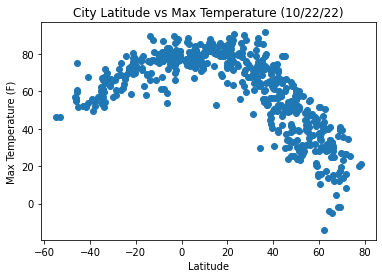

In [11]:
#create x and y values 
x_values = (city_data["Lat"])
y_values = (city_data["Max Temp"])

#plot values  
plt.scatter(x_values,y_values)

#create lables and title 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs Max Temperature (10/22/22)")

#export chart to pngs
plt.savefig("Lat_Vs_Temp.png")

#show plot 
plt.show()

This scatterplot shows the relationship between the cities' latitude and maximum temperature.

## Latitude vs. Humidity Plot

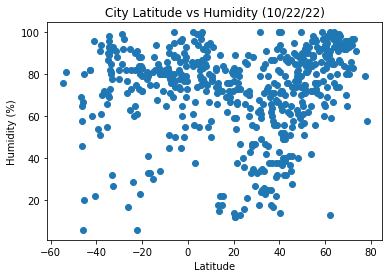

In [12]:
#create x and y values 
x_values = (city_data["Lat"])
y_values = (city_data["Humidity"])

#plot values 
plt.scatter(x_values,y_values)

#create lables and title 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs Humidity (10/22/22)")

#export chart to pngs
plt.savefig("Lat_Vs_Humidity.png")

#show plot 
plt.show()

This scatterplot shows the relationship between the cities' latitude and humidity. 

## Latitude vs. Cloudiness Plot

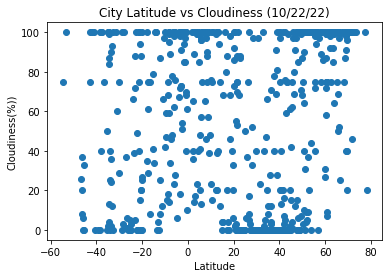

In [13]:
#create x and y values 
x_values = (city_data["Lat"])
y_values = (city_data["Cloudiness"])

#plot values
plt.scatter(x_values,y_values)

#create lables and title 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%))')
plt.title("City Latitude vs Cloudiness (10/22/22)")

#export chart to pngs
plt.savefig("Lat_Vs_Cloudiness.png")

#show plot
plt.show()

This scatterplot shows the relationship between the cities' latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

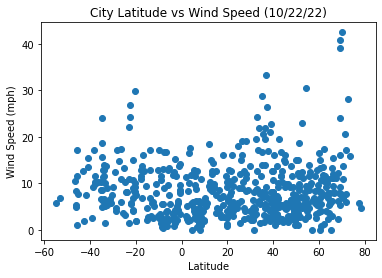

In [14]:
#create x and y values 
x_values = (city_data["Lat"])
y_values = (city_data["Wind Speed"])

#plot values
plt.scatter(x_values,y_values)

#create lables and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed (10/22/22)")

#export chart to pngs
plt.savefig("Lat_Vs_Wind_Speed.png")

#show plot 
plt.show()

This scatterplot shows the relationship between the cities' latitude and wind speed. 

## Linear Regression

In [15]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
northern_hem = city_data.loc[city_data["Lat"] >= 0]
southern_hem = city_data.loc[city_data["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8405198021406061


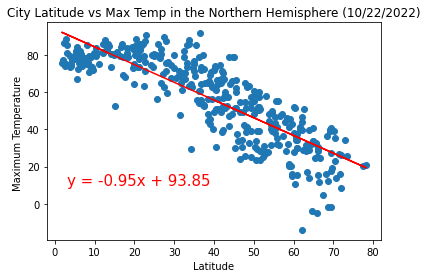

In [16]:
#create x and y values 
x_values = (northern_hem["Lat"])
y_values = (northern_hem["Max Temp"])

# Create equation of line 
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Perform a linear regression 
regress_values = x_values * slope + intercept

#plot values 
plt.scatter(x_values,y_values)

#plot regression line 
plt.plot(x_values,regress_values,"r-")

#create regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#show equation on plot 
plt.annotate(line_eq,(3,10),fontsize=15,color="red")

#create lables and title 
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature ')
plt.title("City Latitude vs Max Temp in the Northern Hemisphere (10/22/2022)")

#print rvalue 
print (f'The r-value is: {rvalue}')

#export chart to pngs
plt.savefig("Northern_Hem_Lat_Vs_Temp.png")

#show plot 
plt.show()

This linear regression shows a strong negative correlation between the cities' latitude and maximum temperature in the northern hemisphere. As the cities' latitude increases, the maximum temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7743354294030806


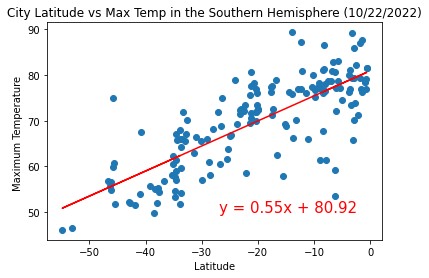

In [17]:
#create x and y values 
x_values = (southern_hem["Lat"])
y_values = (southern_hem["Max Temp"])

# Create equation of line 
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Perform a linear regression 
regress_values = x_values * slope + intercept

#plot values 
plt.scatter(x_values,y_values)

#plot regression line 
plt.plot(x_values,regress_values,"r-")

#create regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#show equation on plot 
plt.annotate(line_eq,(-27,50),fontsize=15,color="red")

#create labels and title 
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature ')
plt.title("City Latitude vs Max Temp in the Southern Hemisphere (10/22/2022)")

#print rvalue 
print (f'The r-value is: {rvalue}')

#export chart to pngs
plt.savefig("Southern_Hem_Lat_Vs_Temp.png")

#show plot 
plt.show()

This linear regression shows a strong positive correlation between the cities' latitude and maximum temperature in the southern hemisphere. As the cities' latitude increases, the maximum temperature increases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24282144493671076


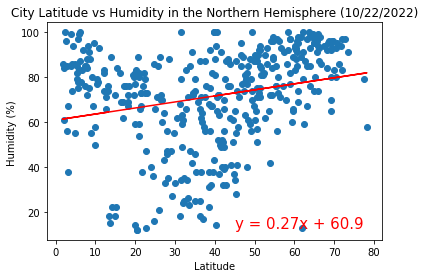

In [18]:
#create x and y values 
x_values = (northern_hem["Lat"])
y_values = (northern_hem["Humidity"])

# Create equation of line 
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Perform a linear regression 
regress_values = x_values * slope + intercept

#plot values 
plt.scatter(x_values,y_values)

#plot regression line 
plt.plot(x_values,regress_values,"r-")

#create regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#show equation on plot 
plt.annotate(line_eq,(45,13),fontsize=15,color="red")

#create lables and title 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%) ')
plt.title("City Latitude vs Humidity in the Northern Hemisphere (10/22/2022)")

#print rvalue 
print (f'The r-value is: {rvalue}')

#export chart to pngs
plt.savefig("Northern_Hem_Lat_Vs_Humidity.png")

#show plot 
plt.show()

This linear regression shows a weak positive correlation between the cities' latitude and humidity in the northern hemisphere. As the cities' latitude increases, the humidity also increases slightly. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15323185419098695


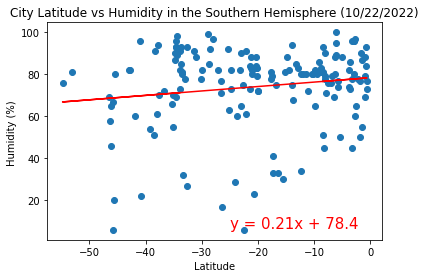

In [19]:
#create x and y values 
x_values = (southern_hem["Lat"])
y_values = (southern_hem["Humidity"])

# Create equation of line 
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Perform a linear regression 
regress_values = x_values * slope + intercept

#plot values 
plt.scatter(x_values,y_values)

#plot regression line 
plt.plot(x_values,regress_values,"r-")

#create regression equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#show equation on plot 
plt.annotate(line_eq,(-25,7),fontsize=15,color="red")

#create labels and title 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%) ')
plt.title("City Latitude vs Humidity in the Southern Hemisphere (10/22/2022)")

#print rvalue 
print (f'The r-value is: {rvalue}')

#export chart to pngs
plt.savefig("Southern_Hem_Lat_Vs_Humidity.png")

#show plot 
plt.show()

This linear regression shows a weak positive correlation between the cities' latitude and humidity in the southern hemisphere. As the cities' latitude increases, the humidity also increases slightly. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21238262600908878


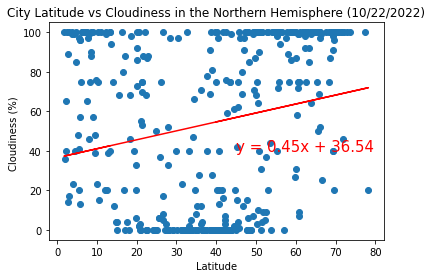

In [20]:
#create x and y values 
x_values = (northern_hem["Lat"])
y_values = (northern_hem["Cloudiness"])

# Create equation of line 
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Perform a linear regression 
regress_values = x_values * slope + intercept

#plot values 
plt.scatter(x_values,y_values)

#plot regression line 
plt.plot(x_values,regress_values,"r-")

#create regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#show equation on plot 
plt.annotate(line_eq,(45,40),fontsize=15,color="red")

#create lables and title 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
plt.title("City Latitude vs Cloudiness in the Northern Hemisphere (10/22/2022)")

#print rvalue 
print (f'The r-value is: {rvalue}')

#export chart to pngs
plt.savefig("Northern_Hem_Lat_Vs_Cloudiness.png")

#show plot 
plt.show()

This linear regression shows a weak positive correlation between the cities' latitude and cloudiness in the northern hemisphere. As the cities' latitude increases, the cloudiness also increases slightly. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2359733651559997


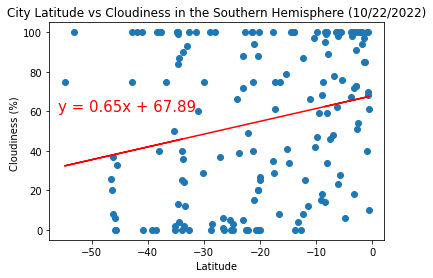

In [21]:
#create x and y values 
x_values = (southern_hem["Lat"])
y_values = (southern_hem["Cloudiness"])

# Create equation of line 
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Perform a linear regression 
regress_values = x_values * slope + intercept

#plot values 
plt.scatter(x_values,y_values)

#plot regression line 
plt.plot(x_values,regress_values,"r-")

#create regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#show equation on plot 
plt.annotate(line_eq,(-56,60),fontsize=15,color="red")

#create labels ansd title 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
plt.title("City Latitude vs Cloudiness in the Southern Hemisphere (10/22/2022)")

#print rvalue 
print (f'The r-value is: {rvalue}')

#export chart to pngs
plt.savefig("Southern_Hem_Lat_Vs_Cloudiness.png")

#show plot 
plt.show()

This linear regression shows a weak positive correlation between the cities' latitude and cloudiness in the southern hemisphere. As the cities' latitude increases, the cloudiness also increases slightly.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15234422333251266


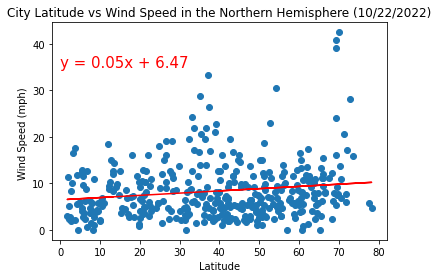

In [22]:
#create x and y values 
x_values = (northern_hem["Lat"])
y_values = (northern_hem["Wind Speed"])


# Create equation of line 
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Perform a linear regression 
regress_values = x_values * slope + intercept

#plot values 
plt.scatter(x_values,y_values)

#plot regression line 
plt.plot(x_values,regress_values,"r-")

#create regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#show equation on plot 
plt.annotate(line_eq,(0,35),fontsize=15,color="red")

#create labels and title 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph) ')
plt.title("City Latitude vs Wind Speed in the Northern Hemisphere (10/22/2022)")

#print rvalue 
print (f'The r-value is: {rvalue}')

#export chart to pngs
plt.savefig("Northern_Hem_Lat_Vs_Wind_Speed.png")

#show plot 
plt.show()

This linear regression shows a very weak positive correlation between the cities' latitude and wind speed in the northern hemisphere. As the cities' latitude increases, the wind speed also increases slightly.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20383661943142906


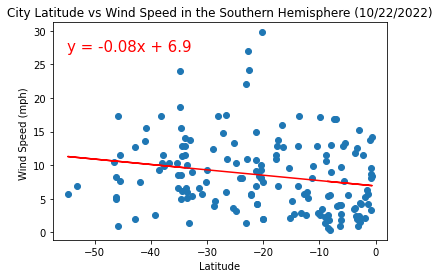

In [23]:
#create x and y values 
x_values = (southern_hem["Lat"])
y_values = (southern_hem["Wind Speed"])

# Create equation of line 
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Perform a linear regression 
regress_values = x_values * slope + intercept

#plot values 
plt.scatter(x_values,y_values)

#plot regression line 
plt.plot(x_values,regress_values,"r-")

#create regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#show equation on plot 
plt.annotate(line_eq,(-55,27),fontsize=15,color="red")

#create labels and title 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph) ')
plt.title("City Latitude vs Wind Speed in the Southern Hemisphere (10/22/2022)")

#print rvalue 
print (f'The r-value is: {rvalue}')

#export chart to pngs
plt.savefig("Southern_Hem_Lat_Vs_Wind_Speed.png")

#show plot 
plt.show()

This linear regression shows a weak negative correlation between the cities' latitude and wind speed in the southern hemisphere. As the cities' latitude increases, the wind speed decreases slightly.

#### Three Observable Trends

1) In the graph measuring latitude vs max temp, the values are clustered together near the equator. As cities move farther from the equator, there is more variation in temperature. 

2) The humidity levels of cities is more concentrated in high percentages across all included latitudes indicating that all cities experience similar humidity levels despite latitude . 

3) The wind speed of cities is more concentrated in low mph across all included latitudes indicating that all cities experience similar wind speeds despite latitude. 